In [1]:
import os
import csv
import platform
import pandas as pd
import networkx as nx
from graph_partitioning import GraphPartitioning, utils

run_metrics = True

cols = ["WASTE", "CUT RATIO", "EDGES CUT", "TOTAL COMM VOLUME", "MODULARITY", "LONELINESS", "NETWORK PERMANENCE", "NORM. MUTUAL INFO", "EDGE CUT WEIGHT", "FSCORE", "FSCORE RELABEL IMPROVEMENT"]
pwd = %pwd

config = {

    "DATA_FILENAME": os.path.join(pwd, "data", "predition_model_tests", "network", "network_1.txt"),
    "OUTPUT_DIRECTORY": os.path.join(pwd, "output"),

    # Set which algorithm is run for the PREDICTION MODEL.
    # Either: 'FENNEL' or 'SCOTCH'
    "PREDICTION_MODEL_ALGORITHM": "FENNEL",

    # Alternativly, read input file for prediction model.
    # Set to empty to generate prediction model using algorithm value above.
    "PREDICTION_MODEL": "",

    
    "PARTITIONER_ALGORITHM": "FENNEL",

    # File containing simulated arrivals. This is used in simulating nodes
    # arriving at the shelter. Nodes represented by line number; value of
    # 1 represents a node as arrived; value of 0 represents the node as not
    # arrived or needing a shelter.
    "SIMULATED_ARRIVAL_FILE": os.path.join(pwd,
                                           "data",
                                           "predition_model_tests",
                                           "dataset_1_shift_rotate",
                                           "simulated_arrival_list",
                                           "percentage_of_prediction_correct_90",
                                           "arrival_90_1.txt"
                                          ),

    # File containing the prediction of a node arriving. This is different to the
    # simulated arrivals, the values in this file are known before the disaster.
    "PREDICTION_LIST_FILE": os.path.join(pwd,
                                         "data",
                                         "predition_model_tests",
                                         "dataset_1_shift_rotate",
                                         "prediction_list",
                                         "prediction_1.txt"
                                        ),

    # File containing the geographic location of each node, in "x,y" format.
    "POPULATION_LOCATION_FILE": os.path.join(pwd,
                                             "data",
                                             "predition_model_tests",
                                             "coordinates",
                                             "coordinates_1.txt"
                                            ),

    # Number of shelters
    "num_partitions": 4,

    # The number of iterations when making prediction model
    "num_iterations": 1,

    # Percentage of prediction model to use before discarding
    # When set to 0, prediction model is discarded, useful for one-shot
    "prediction_model_cut_off": 0.0,

    # Number of arrivals to batch before recalculating alpha and restreaming.
    "restream_batches": 40,

    # When the batch size is reached: if set to True, each node is assigned
    # individually as first in first out. If set to False, the entire batch
    # is processed and empty before working on the next batch.
    "sliding_window": False,

    # Create virtual nodes based on prediction model
    "use_virtual_nodes": False,

    # Virtual nodes: edge weight
    "virtual_edge_weight": 1.0,
    
    # Loneliness score parameter. Used when scoring a partition by how many
    # lonely nodes exist.
    "loneliness_score_param": 1.2,


    ####
    # GRAPH MODIFICATION FUNCTIONS

    # Also enables the edge calculation function.
    "graph_modification_functions": True,

    # If set, the node weight is set to 100 if the node arrives at the shelter,
    # otherwise the node is removed from the graph.
    "alter_arrived_node_weight_to_100": False,

    # Uses generalized additive models from R to generate prediction of nodes not
    # arrived. This sets the node weight on unarrived nodes the the prediction
    # given by a GAM.
    # Needs POPULATION_LOCATION_FILE to be set.
    "alter_node_weight_to_gam_prediction": False,
    
    # Enables edge expansion when graph_modification_functions is set to true
    "edge_expansion_enabled": True,

    # The value of 'k' used in the GAM will be the number of nodes arrived until
    # it reaches this max value.
    "gam_k_value": 100,

    # Alter the edge weight for nodes that haven't arrived. This is a way to
    # de-emphasise the prediction model for the unknown nodes.
    "prediction_model_emphasis": 1.0,
    
    # This applies the prediction_list_file node weights onto the nodes in the graph
    # when the prediction model is being computed and then removes the weights
    # for the cutoff and batch arrival modes
    "apply_prediction_model_weights": True,

    "SCOTCH_LIB_PATH": os.path.join(pwd, "libs/scotch/macOS/libscotch.dylib")
    if 'Darwin' in platform.system()
    else "/usr/local/lib/libscotch.so",
    
    # Path to the PaToH shared library
    "PATOH_LIB_PATH": os.path.join(pwd, "libs/patoh/lib/macOS/libpatoh.dylib")
    if 'Darwin' in platform.system()
    else os.path.join(pwd, "libs/patoh/lib/linux/libpatoh.so"),
    
    "PATOH_ITERATIONS": 5,
        
    # Expansion modes: 'avg_node_weight', 'total_node_weight', 'smallest_node_weight'
    # 'largest_node_weight'
    # add '_squared' or '_sqrt' at the end of any of the above for ^2 or sqrt(weight)
    # i.e. 'avg_node_weight_squared
    "PATOH_HYPEREDGE_EXPANSION_MODE": 'no_expansion',
    # Alters how much information to print. Keep it at 1 for this notebook.
    # 0 - will print nothing, useful for batch operations.
    # 1 - prints basic information on assignments and operations.
    # 2 - prints more information as it batches arrivals.
    "verbose": 1
}

gp = GraphPartitioning(config)

# Optional: shuffle the order of nodes arriving
# Arrival order should not be shuffled if using GAM to alter node weights
#random.shuffle(gp.arrival_order)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
gp.load_network()

Graph loaded...
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 2938
Average degree:   5.8760
Graph is undirected


In [3]:
#for edge in gp.G.edges(data=True):
#    print(edge)

G = gp.G.copy()
for edge in G.edges(data=True):
    print(edge)



(0, 15, {'weight': 1.0, 'weight_orig': 1.0})
(0, 169, {'weight': 1.0, 'weight_orig': 1.0})
(0, 548, {'weight': 1.0, 'weight_orig': 1.0})
(15, 548, {'weight': 1.0, 'weight_orig': 1.0})
(169, 94, {'weight': 1.0, 'weight_orig': 1.0})
(169, 116, {'weight': 1.0, 'weight_orig': 1.0})
(169, 179, {'weight': 1.0, 'weight_orig': 1.0})
(169, 205, {'weight': 1.0, 'weight_orig': 1.0})
(169, 253, {'weight': 1.0, 'weight_orig': 1.0})
(169, 352, {'weight': 1.0, 'weight_orig': 1.0})
(169, 781, {'weight': 1.0, 'weight_orig': 1.0})
(169, 819, {'weight': 1.0, 'weight_orig': 1.0})
(169, 915, {'weight': 1.0, 'weight_orig': 1.0})
(1, 67, {'weight': 1.0, 'weight_orig': 1.0})
(1, 401, {'weight': 1.0, 'weight_orig': 1.0})
(1, 409, {'weight': 1.0, 'weight_orig': 1.0})
(1, 462, {'weight': 1.0, 'weight_orig': 1.0})
(1, 609, {'weight': 1.0, 'weight_orig': 1.0})
(67, 238, {'weight': 1.0, 'weight_orig': 1.0})
(67, 401, {'weight': 1.0, 'weight_orig': 1.0})
(67, 409, {'weight': 1.0, 'weight_orig': 1.0})
(67, 588, {'wei

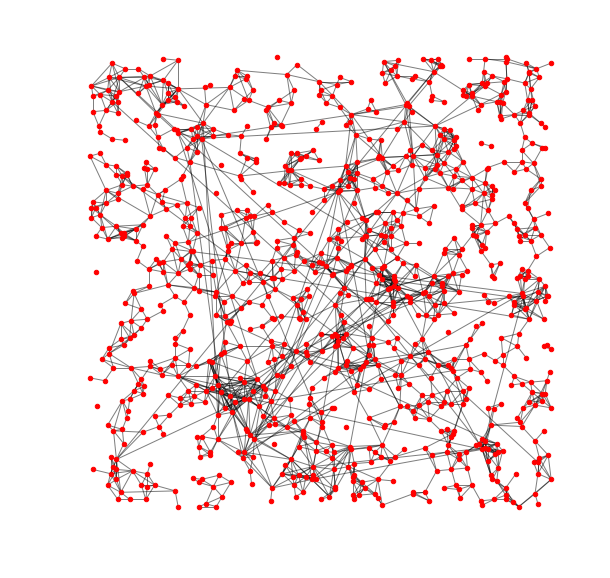

In [4]:
pos = {}
with open(gp.POPULATION_LOCATION_FILE, 'r') as csvfile: 
    reader = csv.reader(csvfile, delimiter=',')
    for node, row in enumerate(reader):
        pos[node] = np.array(row).astype(np.float)

plt.figure(figsize=(10, 10))
plt.axis('off')

nx.draw_networkx_nodes(gp.G, pos, node_size=20, cmap=plt.cm.jet, with_labels=False)
nx.draw_networkx_edges(gp.G, pos, alpha=0.5)
plt.show(gp.G)

In [5]:
gp.init_partitioner()

FENNEL partitioner loaded for generating PREDICTION MODEL.
FENNEL partitioner loaded for making shelter assignments.


# Prediction Model

In [6]:
m = gp.prediction_model()

PREDICTION MODEL
----------------

Hungarian rows [0 1 2 3]
Hungarian cols [0 1 2 3]

Assignments:
[ 0  1  2  3  0  1  3  3  3  3  2  2  0  2  1  0  1  3  2  0  2  1  0  0  0  1  1  1  1  1  1  1  3  3  1  1  1  1  0  2  2  1  3  3  1  1  1  3  2  1  1  1  1  0  1  1  3  3  1  2  0  3  2  2  3  2  3  1  2  2  2  2  1  3  1  3  2  1  2  3  3  3  2  0  1  1  1  3  2  3  1  3  3  3  0  2  0  0  2  2  2  2  0  2  3  0  0  1  2  1  2  2  2  3  1  2  2  1  3  2  3  0  3  1  0  2  3  3  0  1  3  1  3  0  2  3  2  3  2  3  1  2  3  1  1  3  3  2  3  1  3  3  3  2  1  2  3  0  1  3  3  3  3  1  0  2  1  3  2  0  1  0  3  2  2  3  1  2  2  1  2  3  2  1  3  1  3  1  3  3  2  0  3  3  2  2  3  0  3  2  2  2  3  3  1  3  2  2  2  1  2  2  3  2  2  1  3  2  1  3  3  3  3  2  2  0  2  3  1  2  2  2  2  2  0  1  3  2  2  0  3  2  2  3  1  1  1  3  2  0  3  2  2  0  3  2  0  2  2  3  1  3  3  2  2  1  2  3  1  3  2  3  2  0  0  2  2  2  2  1  1  1  3  1  3  3  3  3  3  2  2  3  3  2  1  2  2  3  2  2 

   WASTE  CUT RATIO  EDGES CUT  TOTAL COMM VOLUME  MODULARITY  LONELINESS  \
1  0.927   0.257999        758                777     0.76226         0.0   

  NETWORK PERMANENCE  NORM. MUTUAL INFO  EDGE CUT WEIGHT  FSCORE  \
1           0.379307                1.0            758.0     1.0   

   FSCORE RELABEL IMPROVEMENT  
1                         0.0  


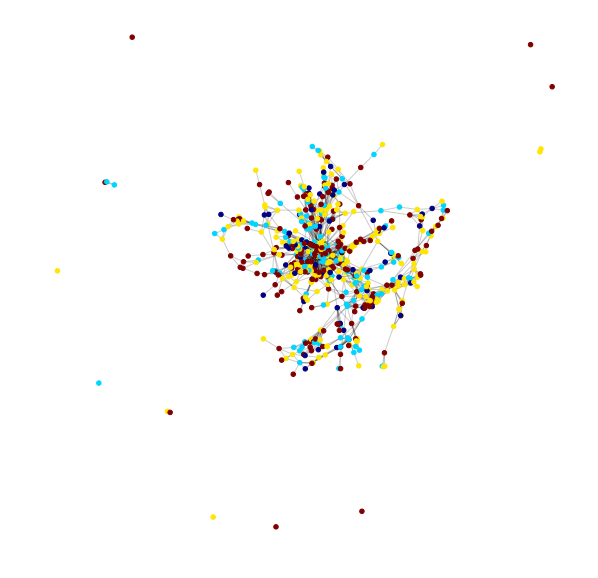

In [7]:
rows = list(range(1, len(m)+1))
df = pd.DataFrame(m, index=rows, columns=cols)
print(df)

pos = nx.spring_layout(gp.G)
plt.figure(figsize=(10, 10))
plt.axis('off')
colours = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'green'}

colour = []
#for n in gp.G.nodes_iter():
#    colour += [colours[gp.assignments[n]]]

nx.draw_networkx_nodes(gp.G, pos, node_size=20, node_color=gp.assignments, cmap=plt.cm.jet, with_labels=False)
nx.draw_networkx_edges(gp.G, pos, alpha=0.2)
plt.show(gp.G)

# Assign Cut Off

In [8]:
m = gp.assign_cut_off()

Discarding prediction model

Hungarian rows [0 1 2 3]
Hungarian cols [0 1 2 3]

Assignments:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 

In [9]:
rows = list(range(1, len(m)+1))
df = pd.DataFrame(m, index=rows, columns=cols)
print(df)

   WASTE  CUT RATIO  EDGES CUT  TOTAL COMM VOLUME  MODULARITY  LONELINESS  \
1      0        0.0          0                  0           0         0.0   

  NETWORK PERMANENCE  NORM. MUTUAL INFO  EDGE CUT WEIGHT  FSCORE  \
1                nan          -0.000002                0       0   

   FSCORE RELABEL IMPROVEMENT  
1                           0  


# Run Simulation

In [10]:
m = gp.batch_arrival()

Assigning in batches of 40
--------------------------------

Hungarian rows [0 1 2 3]
Hungarian cols [1 0 2 3]
Hungarian rows [0 1 2 3]
Hungarian cols [1 0 2 3]
Hungarian rows [0 1 2 3]
Hungarian cols [1 0 2 3]
Hungarian rows [0 1 2 3]
Hungarian cols [1 0 2 3]
Hungarian rows [0 1 2 3]
Hungarian cols [1 0 2 3]
Hungarian rows [0 1 2 3]
Hungarian cols [1 0 2 3]
Hungarian rows [0 1 2 3]
Hungarian cols [1 0 2 3]

Assignments:
[-1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1  1  0 -1 -1 -1  2  2 -1 -1 -1 -1 -1  3  3 -1 -1 -1  0 -1  0 -1  1 -1 -1 -1 -1  1 -1  2  3  0 -1 -1 -1 -1  1 -1 -1  2 -1 -1  3 -1  2  3 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  2  2  3 -1 -1 -1 -1 -1  1 -1  2  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  2  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1  1 -1 -1  2 -1  3 -1 -1 -1  1  3  0 -1 -1 -1 -1  1 -1 -1  3 -1  3 -1  1 -1 -1 -1 -1 -1 -1 -1  2  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1  1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  

      WASTE  CUT RATIO  EDGES CUT  TOTAL COMM VOLUME  MODULARITY  LONELINESS  \
1  0.000000   0.100000        1.0                2.0    0.304688         0.0   
2  0.000000   0.178571       10.0               14.0    0.646236         0.0   
3  0.000000   0.179487       21.0               30.0    0.671750         0.0   
4  0.050000   0.172414       35.0               49.0    0.742318         0.0   
5  0.040000   0.206897       66.0               88.0    0.752947         0.0   
6  0.000000   0.235556      106.0              129.0    0.771629         0.0   
7  0.103943   0.241265      145.0              164.0    0.780776         0.0   

   NETWORK PERMANENCE  NORM. MUTUAL INFO  EDGE CUT WEIGHT    FSCORE  \
1            1.000000           0.025275              1.0  0.206797   
2            1.000000           0.035163             10.0  0.224382   
3           -0.962617           0.043285             21.0  0.237993   
4           -0.962617           0.047984             35.0  0.265474   
5   

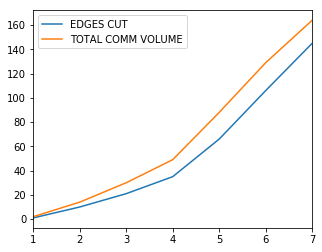

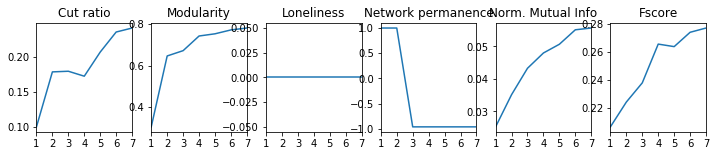

In [11]:
rows = list(range(1, len(m)+1))
df = pd.DataFrame(m, index=rows, columns=cols).astype(float)
print(df)

if len(df) > 1:
    t = int(len(rows) / 5)
    xticks = rows[::t]
    df.plot(y=['EDGES CUT', 'TOTAL COMM VOLUME'], xticks=xticks, figsize=(5,4))

    fig, axs = plt.subplots(1,6)
    df.plot(y=['CUT RATIO'], title='Cut ratio', xticks=xticks, figsize=(12,2), legend=False, ax=axs[0])
    df.plot(y=['MODULARITY'], title='Modularity', xticks=xticks, figsize=(12,2), legend=False, ax=axs[1])
    df.plot(y=['LONELINESS'], title='Loneliness', xticks=xticks, figsize=(12,2), legend=False, ax=axs[2])
    df.plot(y=['NETWORK PERMANENCE'], title='Network permanence', xticks=xticks, figsize=(12,2), legend=False, ax=axs[3])
    df.plot(y=['NORM. MUTUAL INFO'], title='Norm. Mutual Info', xticks=rows, figsize=(12,2), legend=False, ax=axs[4])
    df.plot(y=['FSCORE'], title='Fscore', xticks=rows, figsize=(12,2), legend=False, ax=axs[5])

else:
    print("\n\nNot enough data points to plot charts. There is only one row.")

# Network Visual

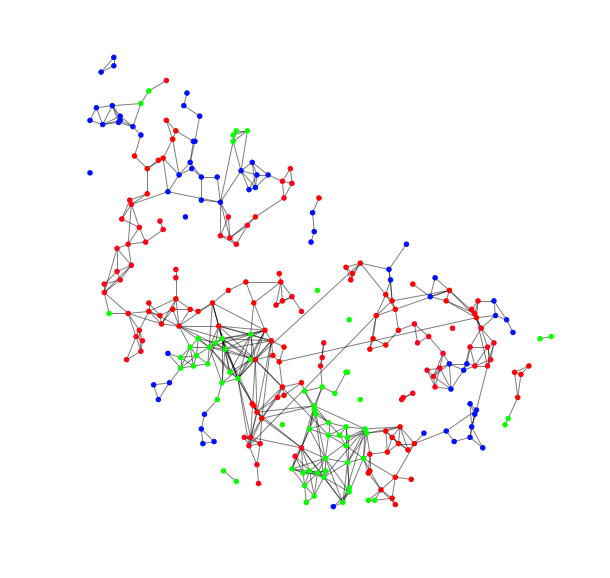

In [12]:
part = dict(zip(gp.G.nodes(), gp.assignments))
values = [part.get(node) for node in gp.G.nodes()]

pos_spring = nx.spring_layout(gp.G, k=0.5, iterations=20)

pos = {}
with open(gp.POPULATION_LOCATION_FILE, 'r') as csvfile: 
    reader = csv.reader(csvfile, delimiter=',')
    for node, row in enumerate(reader):
        pos[node] = np.array(row).astype(np.float)

# create colours
cmap = utils.get_cmap(gp.num_partitions)
colours = np.zeros((gp.G.number_of_nodes(), 4), dtype=np.float)
for i,n in enumerate(gp.G.nodes_iter()):
    if gp.assignments[n] == -1:
        col = [(1.0, 1.0, 1.0, 1.0)]
    else:
        col = [cmap(gp.assignments[n])]
    colours[i] = np.array(col, dtype=np.float)

plt.figure(figsize=(10, 10))
plt.axis('off')
nx.draw_networkx_nodes(gp.G, pos, node_size=20, node_color=colours, cmap=plt.cm.jet, with_labels=False)
nx.draw_networkx_edges(gp.G, pos, alpha=0.5)
plt.show(gp.G)

#nx.draw_networkx_nodes(gp.G, pos_spring, node_size=20, node_color=colour, cmap=plt.cm.jet, with_labels=False)
#nx.draw_networkx_edges(gp.G, pos_spring, alpha=0.5)
#plt.show(gp.G)

# Metrics

In [13]:
if run_metrics:
    gp.get_metrics()

Complete graph with 1000 nodes

Config
-------

file: 193517
num_partitions: 4
num_iterations: 1
prediction_model_cut_off: 0.0
restream_batches: 40
use_virtual_nodes: False
virtual_edge_weight: 1.0
edges_cut: 145

Metrics
-------

waste: 0.028999999999999984
cut_ratio: 0.24126455906821964
total_communication_volume: 164
network_permanence: -0.620997
Q: 0.7136289766639627
NQ: -1.7159766704961086
Qds: 0.0804161933132579
intraEdges: 25.15909090909091
interEdges: 4.318181818181818
intraDensity: 0.08131709999103509
modularity degree: 5.3867662207147795
conductance: 0.6584066287177224
expansion: 1.0908892628946332
contraction: 1.3357422729271229
fitness: 0.32290566846450536
QovL: 0.9120100380960231

Partition 0 with 77 nodes
-----------------------------


Metrics
file: 193517
partition: 0
population: 77
Q: 0.6550026222248121
NQ: 0.4191280718336484
Qds: 0.19599116770751723
intraEdges: 24.8
interEdges: 2.8
intraDensity: 0.34886853886853897
modularity degree: 14.829365079365079
conductance: 0.